# Building and Training Neural Networks with Pytorch

In last lecture, we have studied how to define a tensor, a function and how to take derivative of a function.
However, building and training neural networks directly with user-defined functions would be very complicated. 

Luckily, Pytorch provides built-in functions which make it much easier to build and train neural networks. In this lecture, we will describe how to use these functions to build (i.e. define) and train neural networks. This lecture includes:


1. Build a logistic regression model
2. Define a training algorithm
3. Load a dataset
4. Train the logistic regression model
5. Test the accuracy of a trained model
6. Reading materials

# Some concepts in machine learning

## Training dataset and test dataset
Define a dataset as $D = \{(x_j, y_j)\}$ and $D=D_1 \cup D_2$, where:

* $D_1$ is the training dataset and $|D_1|$ is the number of data in $D_1$.


* $D_2$ is the test dataset and $|D_2|$ is the number of data in $D_2$.



## Training loss and test loss
Define the loss function:
$$L(\theta) :=\frac{1}{N} \sum_{j=1}^N\ell(y_j, h(x_j; \theta)).$$
Here $\ell(y_j,h(x_j; \theta))$ is the  general distance between real label and predicted label. $h(x_j; \theta)$ is a probability distribution of data $x$.

* Training loss is defined as $L(\theta) :=\frac{1}{|D_1|} \sum_{j=1}^{|D_1|}\ell(y_j, h(x_j; \theta)).$


* Test loss is defined as $L(\theta) :=\frac{1}{|D_2|} \sum_{j=1}^{|D_2|}\ell(y_j, h(x_j; \theta)).$


## Training accuracy and test accuracy
* Training accuracy $= \frac{\text{The number of correct classifications in training dataset}}{\text{the total number of data in training dataset}}$


* Test accuracy $= \frac{\text{The number of correct classifications in test dataset}}{\text{the total number of data in test dataset}}$

Remark: We usually use the max-out method to do classification. For a given data point $x$, we first compute $h(x;\theta)$, then we attached $x$ to the class $i= \arg\max_j h_j(x; \theta)$.
## Epoch

* Epoch: One epoch is when an entire training dataset is used to train the neural network once.


# 1. Build a logistic regression model

In [1]:
# The most important library for building neural networks is the torch.nn library. 
# This library allows us to build neural networks by concatenating different types
# of layers.
import torch
import torch.nn as nn # Import functions from torch.nn

def model(input_size,num_classes):
    return nn.Linear(input_size,num_classes) 

# Define a function named model, which returns a linear model (xW^{T}+b) by 
# nn.Linear(input_size, num_classes)
# input_size is the size of the row vector x
# num_classes is the number of classes to be classified
# This model includes parameters W and b. 

# Question: what are the sizes of W and b?

# Example: in MNIST, the size of all the images is 1*28*28,  
# which can be re-arranged to a row vector x with size 784 so that input_size=784
# num_classes=10 in MNIST.
# Therefore, the size of W is 10*784 and the size of b is 1*10 

# Linear model: xW^{T}+b

# The size of W is num_classes*input_size
# The size of b is 1*num_classes
# The size of input x is 1*input_size (if batch_size=1)

# Question: what are the sizes of W, x and b if we have a mini-batch of data?

In [2]:
# The cross entropy loss is already implemented in Pytorch. You will see how to use it in section 4
criterion = nn.CrossEntropyLoss()


# 2. Define a training algorithm


In [3]:
# This library contains implementations of a number of useful optimization algorithms.
import torch.optim as optim

# The stochastic gradient descent algorithm with a step size of 0.1.
optimizer = optim.SGD(my_model.parameters(), lr=0.1)


NameError: name 'my_model' is not defined

# 3. Load a dataset

The MNIST database of handwritten digits, available from this page, has a training dataset of 60,000 examples, and a test dataset of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image ($1*28*28$). (see more on http://yann.lecun.com/exdb/mnist/).

In the following, we show how to load the MNIST dataset by using Pytorch

/opt/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <9E417059-FF86-3C93-B8D5-8A071C12B008> /opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <C75FB263-DA0F-3206-97B0-4B436CBAB6DB> /opt/anaconda3/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([2, 1, 28, 28])
torch.Size([28, 28])


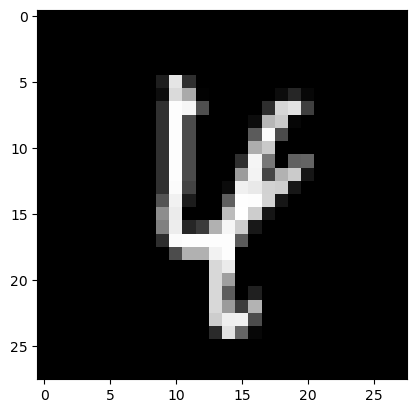

The label of the given image is tensor([4, 0])


In [4]:
import torchvision
import matplotlib.pyplot as plt

# Transforms images to a Pytorch Tensor.
MNIST_transform = torchvision.transforms.ToTensor()

# Load the set of training images. 
# root is the location of the data you saved
# train=True: the data loaded is training data
# download=True: if the data does not exist in root, then download it online
# transform: do some transformations to the input data

trainset = torchvision.datasets.MNIST(root='./data', train= True, download=True, transform=MNIST_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2, shuffle=True)

# Load the set of test images.
testset = torchvision.datasets.MNIST(root='./data', train= False, download=True, transform=MNIST_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False) 

# Let’s plot some of the images to see what we’re dealing with.
def plot_images(images):
    images_for_plot = images[0,0,:,:] # extract the 28*28 tensor from the tensor
    print(images_for_plot.size())
    plt.imshow(images_for_plot, cmap='gray')  # plot the image with colormaps='gray'
    plt.show()

for i, (images, labels) in enumerate(trainloader): # ith batch of images and labels
    print(images.size())  # [batch_size, channel_size, image_size_x, image_size_y]
    plot_images(images)
    print('The label of the given image is',labels) 
    break  #force to stop the for loop

# 4. Train the logistic regression model

In [5]:
def model(input_size,num_classes):
    return nn.Linear(input_size,num_classes)

input_size = 784
num_classes = 10


my_model =model(input_size, num_classes)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(my_model.parameters(), lr=0.1)

MNIST_transform = torchvision.transforms.ToTensor()

trainset = torchvision.datasets.MNIST(root='./data', train= True, download=True, transform=MNIST_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train= False, download=True, transform=MNIST_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False) 

# Write a loop to train the model using the given optimizer and loss functions.
num_epochs = 2 
# One epoch is when an entire dataset is passed through the neural network only once.
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # You can check the size of image before images.reshape, which is [batch_size,1,28,28]
        #print(images.size()) 
        # Reshape MNIST images to (batch_size, input_size)
        images = images.reshape(images.size(0), 28*28)
        # You can check the size of image after images.reshape, which is [batch_size,784]
        #print(images.size())
        
        # Forward pass to get the loss
        outputs = my_model(images) # the outputs of xW^{T}+b
        loss = criterion(outputs, labels) 
        
        # Backward and compute the gradient
        optimizer.zero_grad()
        loss.backward()  #backpropragation
        optimizer.step()
        
        if (i+1) % 100 == 0: # "%" compute the remainder. print the result every 10000 iterations
            print('Epoch [{}/{}], Step [{}/{}], Loss: {}' .format(epoch+1, num_epochs, i+1, len(trainloader), loss.item())) 
            
            

Epoch [1/2], Step [100/600], Loss: 0.6609846353530884
Epoch [1/2], Step [200/600], Loss: 0.4251827001571655
Epoch [1/2], Step [300/600], Loss: 0.503912091255188
Epoch [1/2], Step [400/600], Loss: 0.32619303464889526
Epoch [1/2], Step [500/600], Loss: 0.38644513487815857
Epoch [1/2], Step [600/600], Loss: 0.2960512638092041
Epoch [2/2], Step [100/600], Loss: 0.4331343472003937
Epoch [2/2], Step [200/600], Loss: 0.36499708890914917
Epoch [2/2], Step [300/600], Loss: 0.3292960226535797
Epoch [2/2], Step [400/600], Loss: 0.2919574975967407
Epoch [2/2], Step [500/600], Loss: 0.4668726325035095
Epoch [2/2], Step [600/600], Loss: 0.29870325326919556


# 5. Test a the accuracy of a trained model

In [6]:
# Calculate the total number of test samples and the number of correctly
# classified test samples
num_correct = 0
total = 0
for i, (images, labels) in enumerate(testloader):
    images = images.reshape(images.size(0), 1*28*28)
    outputs = my_model(images)
# Take the most likely label as the predicted label. 
# value, indices = torch.max(input, dim) 
# if dim = 0, it returns the maximum value of each column of the given 2D input tensor
# if dim = 1, it returns the maximum value of each row of the given 2D input tensor
# indices is the index location of each maximum value found (argmax).

    p_max, predicted = torch.max(outputs, 1) 
    total += labels.size(0) # you can also use labels.size()[0], see the test  below
    num_correct += (predicted == labels).sum()
print('Out of {} samples, the model correctly classified {}, the test accuracy {}' .format(total, num_correct, float(num_correct)/total))

Out of 10000 samples, the model correctly classified 9112, the test accuracy 0.9112


In [7]:
# Test torch.max() and tensor.size()
a = torch.tensor([[1,2,3,4],[5,6,7,8],[9,14,16,12],[13,10,15,11],[0,0,0,0]])
print(a)

print(a.size())

print(a.size(0))

print(a.size()[0])


tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 14, 16, 12],
        [13, 10, 15, 11],
        [ 0,  0,  0,  0]])
torch.Size([5, 4])
5
5


In [8]:
print(torch.max(a, 1)) # it returns the maximum value of each row of the given 2D input tensor

torch.return_types.max(
values=tensor([ 4,  8, 16, 15,  0]),
indices=tensor([3, 3, 2, 2, 0]))


In [9]:
print(torch.max(a, 0)) # returns the maximum value of each column of the given 2D input tensor

torch.return_types.max(
values=tensor([13, 14, 16, 12]),
indices=tensor([3, 2, 2, 2]))


# Reading material

1. (Important) Autograd: Automatic Differentiation https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

2. Classes in Python provide a means of data and functionality together 
    https://www.w3schools.com/python/python_classes.asp

3. Module: a file containing a set of functions you want to include in your application. Consider a module to be the same as a code library.
    https://www.w3schools.com/python/python_modules.asp

3. Details of torch.nn https://pytorch.org/docs/stable/nn.html

4. Details of torch package https://pytorch.org/docs/stable/torch.html
